# R Exam

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period. In spanish is called the PIB (Producto Interno Bruto).
The Human Development Index (HDI) is a statistic composite index of life expectancy, education (Literacy Rate, Gross Enrollment Ratio at different levels and Net Attendance Ratio), and per capita income indicators, which are used to rank countries into four tiers of human development.

Several online websites (among which the spanish wikipedia https://es.wikipedia.org/wiki/%C3%8Dndice_de_desarrollo_humano), have suggested that GDP and HDI are strongly correlated, meaning that the better the country's economy the better the human development of their citizens. Let's try to plot the data for Spain (from 2007) and analyze it.

- Load the files GDP.csv and HDI.csv using read.csv()
- Analyze the file that you have just loaded with head()  and str()
- Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 
- The new data frame will contain two columns names "Province". remove one of the columns
- Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province	GDP.per.capita,	CCAA and HDI. **With each province matching its CCAA**. (Fig, 1)
- Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).
- Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)
- Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().
- Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI
- Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)
- Plot again the original scatterplot with geom_point and color by CCAA. 
- Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 
- Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.
- Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters  hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)
- *(Optional)* It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). <br> However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP. <br>
Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?


**FIGURE 1**
<img src="Fig 1.png">
**FIGURE 2**
<img src="Fig 2.png">
**FIGURE 3**
<img src="Fig 3.png">
**FIGURE 4**
<img src="Fig 4.png">


#### Problem 1- Load the files GDP.csv and HDI.csv using read.csv()

In [1]:
GDP <- read.csv("GDP.csv")
HDI <- read.csv("HDI.csv")

#### Problem 2- Analyze the file that you have just loaded with head()  and str()

In [2]:
head(GDP)
str(GDP)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


In [3]:
head(HDI)
str(HDI)

,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


#### Problem 3- Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 

In [4]:
order_HDI <- HDI[order(HDI$Province),]
head(order_HDI)
tail(order_HDI)

,Province,HDI
,<chr>,<dbl>
49,Álava,0.990
14,Albacete,0.933
11,Alicante,0.930
2,Almería,0.915
29,Asturias,0.956
27,Ávila,0.952


,Province,HDI
,<chr>,<dbl>
16,Toledo,0.933
24,Valencia,0.946
45,Valladolid,0.978
48,Vizcaya,0.988
34,Zamora,0.959
42,Zaragoza,0.968


In [5]:
order_GDP <- GDP[order(GDP$Province),]
head(order_GDP)
tail(order_GDP)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
48,Álava,36.055,País Vasco Navarra y Rioja
26,Albacete,17.864,Castilla-La Mancha
34,Alicante,19.201,Comunitat Valenciana y Murcia
1,Almería,20.873,Andalucía y Extremadura
12,Asturias,21.634,Asturias y Cantabria
16,Ávila,18.382,Castilla y León


,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
29,Toledo,19.251,Castilla-La Mancha
36,Valencia,22.538,Comunitat Valenciana y Murcia
24,Valladolid,23.947,Castilla y León
50,Vizcaya,27.705,País Vasco Navarra y Rioja
25,Zamora,17.952,Castilla y León
11,Zaragoza,26.082,Aragon


In [6]:
alldates <- cbind (order_GDP, order_HDI)
head(alldates)

,Province,GDP.per.capita,CCAA,Province,HDI
,<chr>,<dbl>,<chr>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,Albacete,17.864,Castilla-La Mancha,Albacete,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,Almería,20.873,Andalucía y Extremadura,Almería,0.915
12,Asturias,21.634,Asturias y Cantabria,Asturias,0.956
16,Ávila,18.382,Castilla y León,Ávila,0.952


#### Problem 4 and 5 - The new data frame will contain two columns names "Province". remove one of the columns. Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province

In [7]:
remove_Province <- alldates[,-4]
head(remove_Province)
tail(remove_Province)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


#### Problem 6- Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).

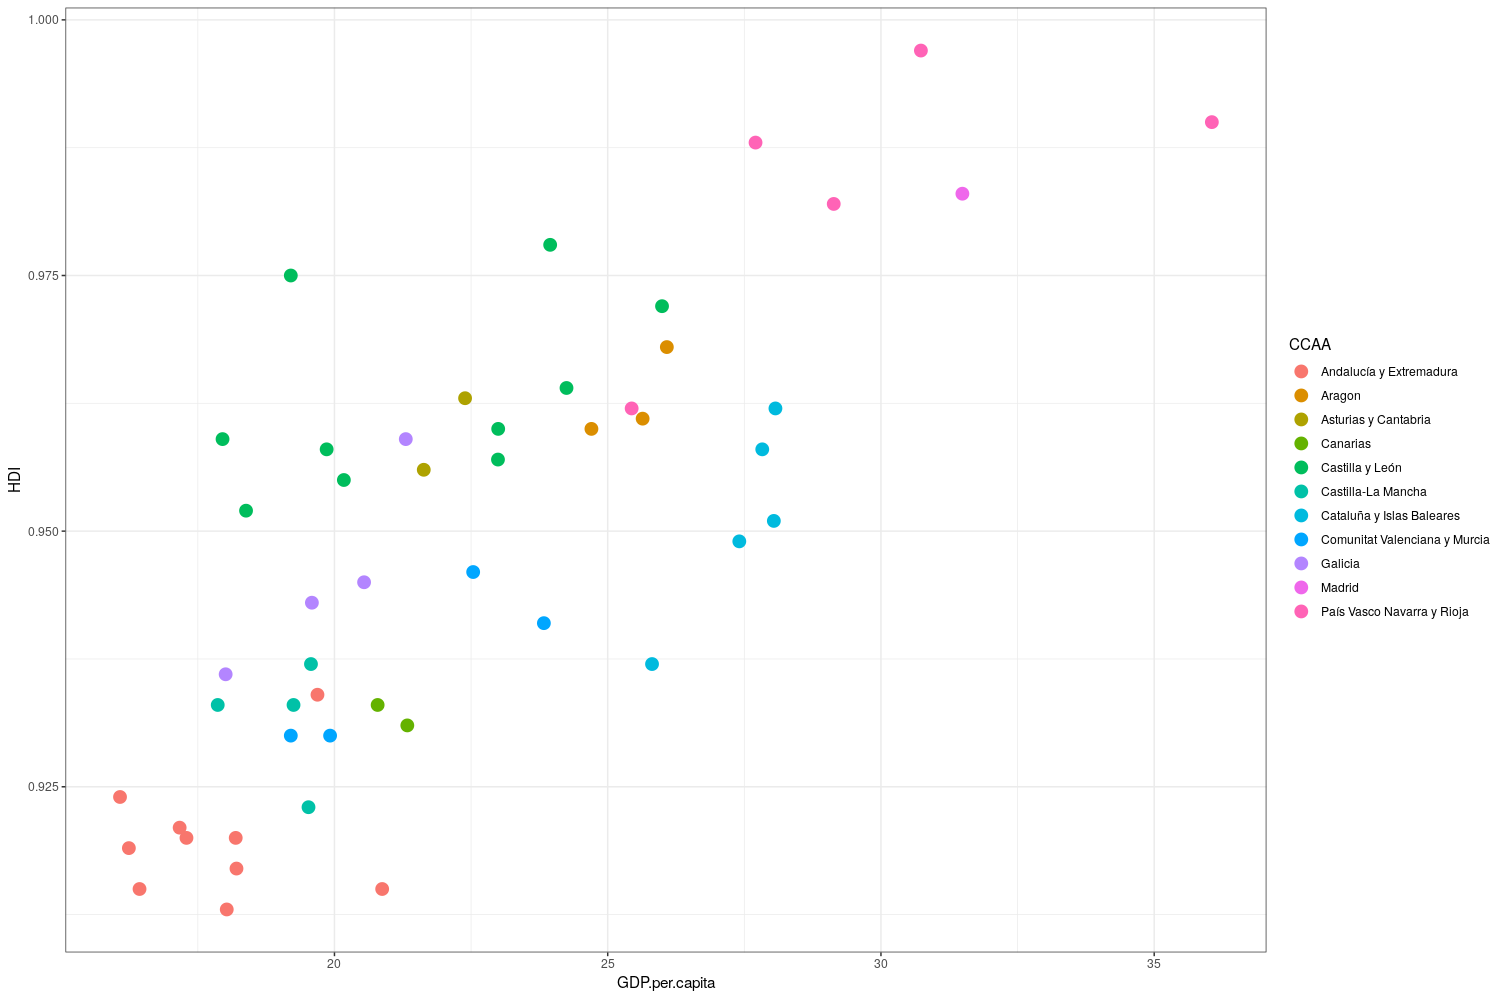

In [8]:
library (ggplot2)
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 100)
theme_set (theme_bw())

ggplot(remove_Province, aes(x=GDP.per.capita, y=HDI, color=CCAA)) + geom_point(size=4)


#### Problem 7- Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)

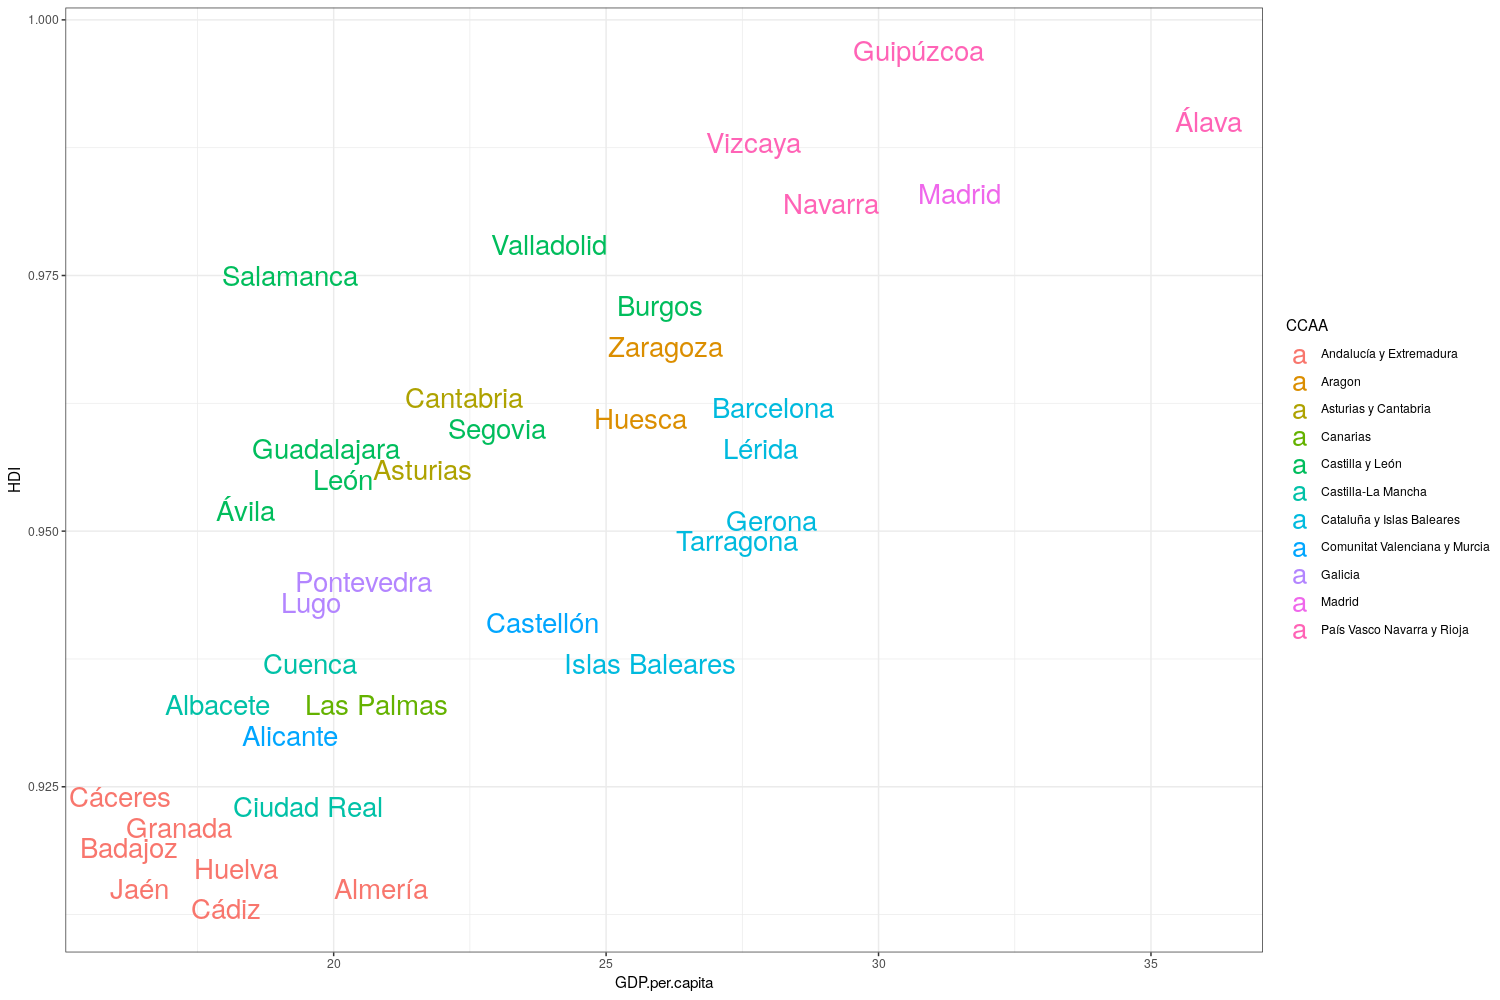

In [9]:
ggplot(remove_Province, aes(x=GDP.per.capita, y=HDI, color=CCAA, label=Province)) + 
    geom_text(check_overlap=T, size=7)


#### Problem 8- Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().

In [10]:
mean_table <- aggregate (x=remove_Province[,-ncol(GDP)], by=list(remove_Province$CCAA), FUN=mean)
mean_table_new <- mean_table [,-2]
colnames(mean_table_new) <- c("CCAA", "GDP_mean", "HDI_mean")
mean_table_new

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.defaul

CCAA,GDP_mean,HDI_mean
<chr>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980
Aragon,25.47433,0.96300
Asturias y Cantabria,22.01200,0.95950
Canarias,21.06150,0.93200
Castilla y León,21.57390,0.96300
Castilla-La Mancha,19.05250,0.93150
Cataluña y Islas Baleares,27.43120,0.95140
Comunitat Valenciana y Murcia,21.37275,0.93675
Galicia,19.86075,0.94575


In [11]:
sd_table <- aggregate (x=remove_Province[,-ncol(GDP)], by=list(remove_Province$CCAA), FUN=sd)
sd_table_new <- sd_table[,-2]
colnames(sd_table_new) <- c("CCAA", "GDP_sd", "HDI_sd")
sd_table_new

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message 

CCAA,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>
Andalucía y Extremadura,1.5391112,0.005977736
Aragon,0.7045824,0.004358899
Asturias y Cantabria,0.5345727,0.004949747
Canarias,0.3839590,0.001414214
Castilla y León,2.7926986,0.008956686
Castilla-La Mancha,0.8047768,0.005972158
Cataluña y Islas Baleares,0.9434594,0.009607289
Comunitat Valenciana y Murcia,2.1781260,0.008057088
Galicia,1.4205488,0.009639329


#### Problem 9- Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI

In [12]:
Fig_3 <- cbind(mean_table_new,sd_table_new[,-1])
Fig_3

CCAA,GDP_mean,HDI_mean,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


#### Problem 10- Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)

In [13]:
Fig_3[is.na(Fig_3)] <- 0
Fig_3

CCAA,GDP_mean,HDI_mean,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


#### Problem 11- Plot again the original scatterplot with geom_point and color by CCAA. 

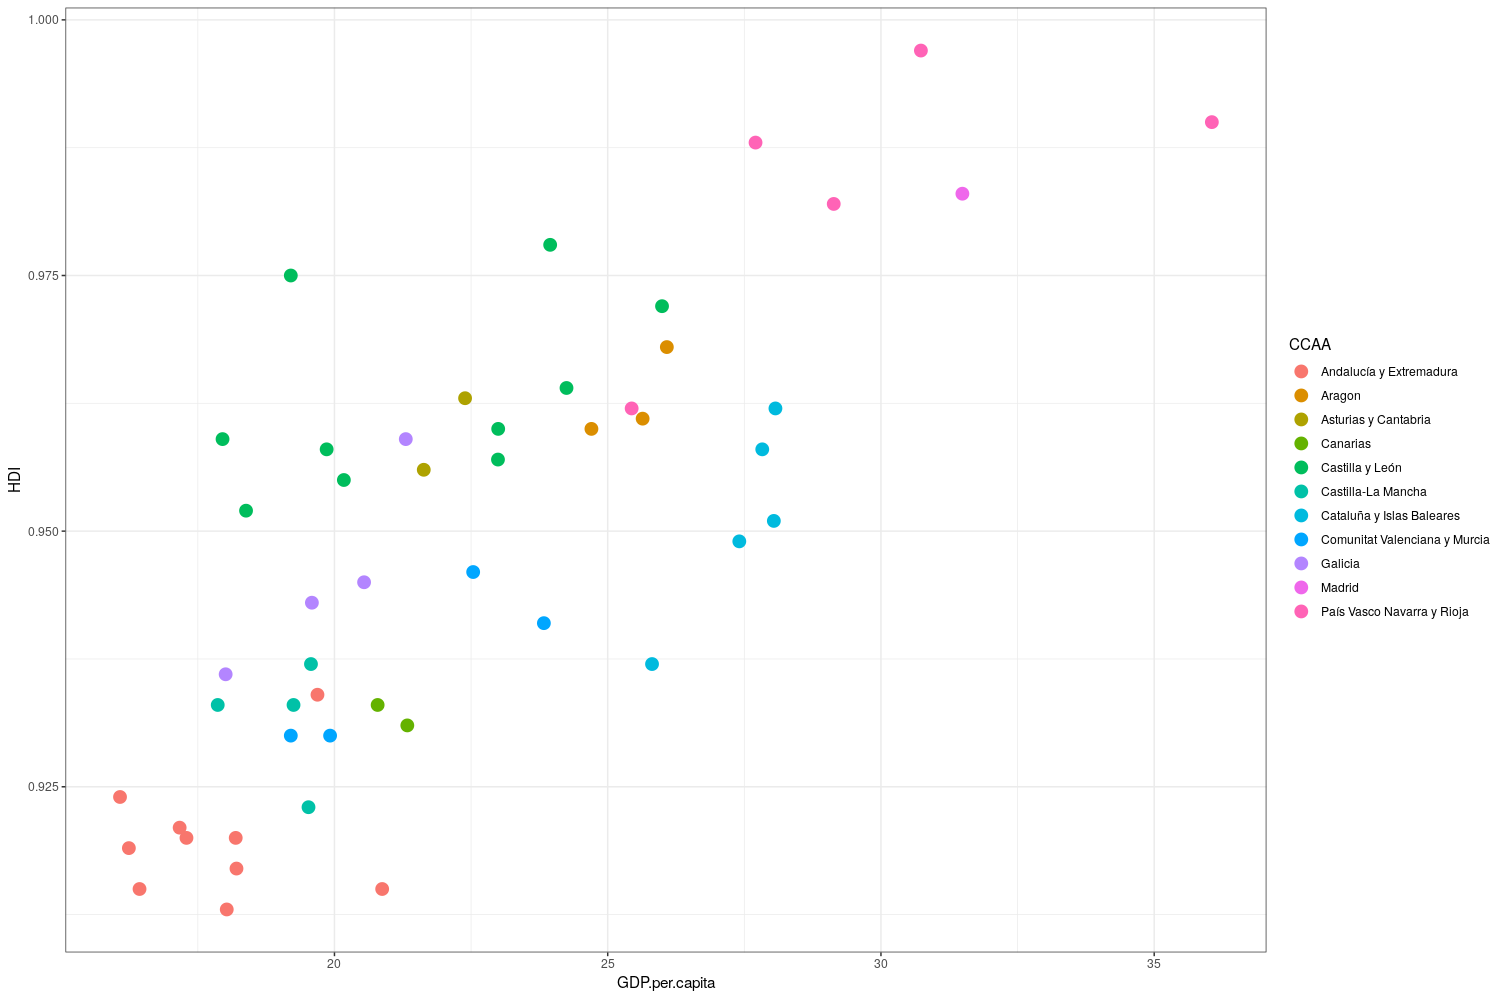

In [14]:
a <- ggplot(remove_Province, aes(x=GDP.per.capita, y=HDI, color=CCAA)) + geom_point(size=4)
a

#### Problem 12- Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces.

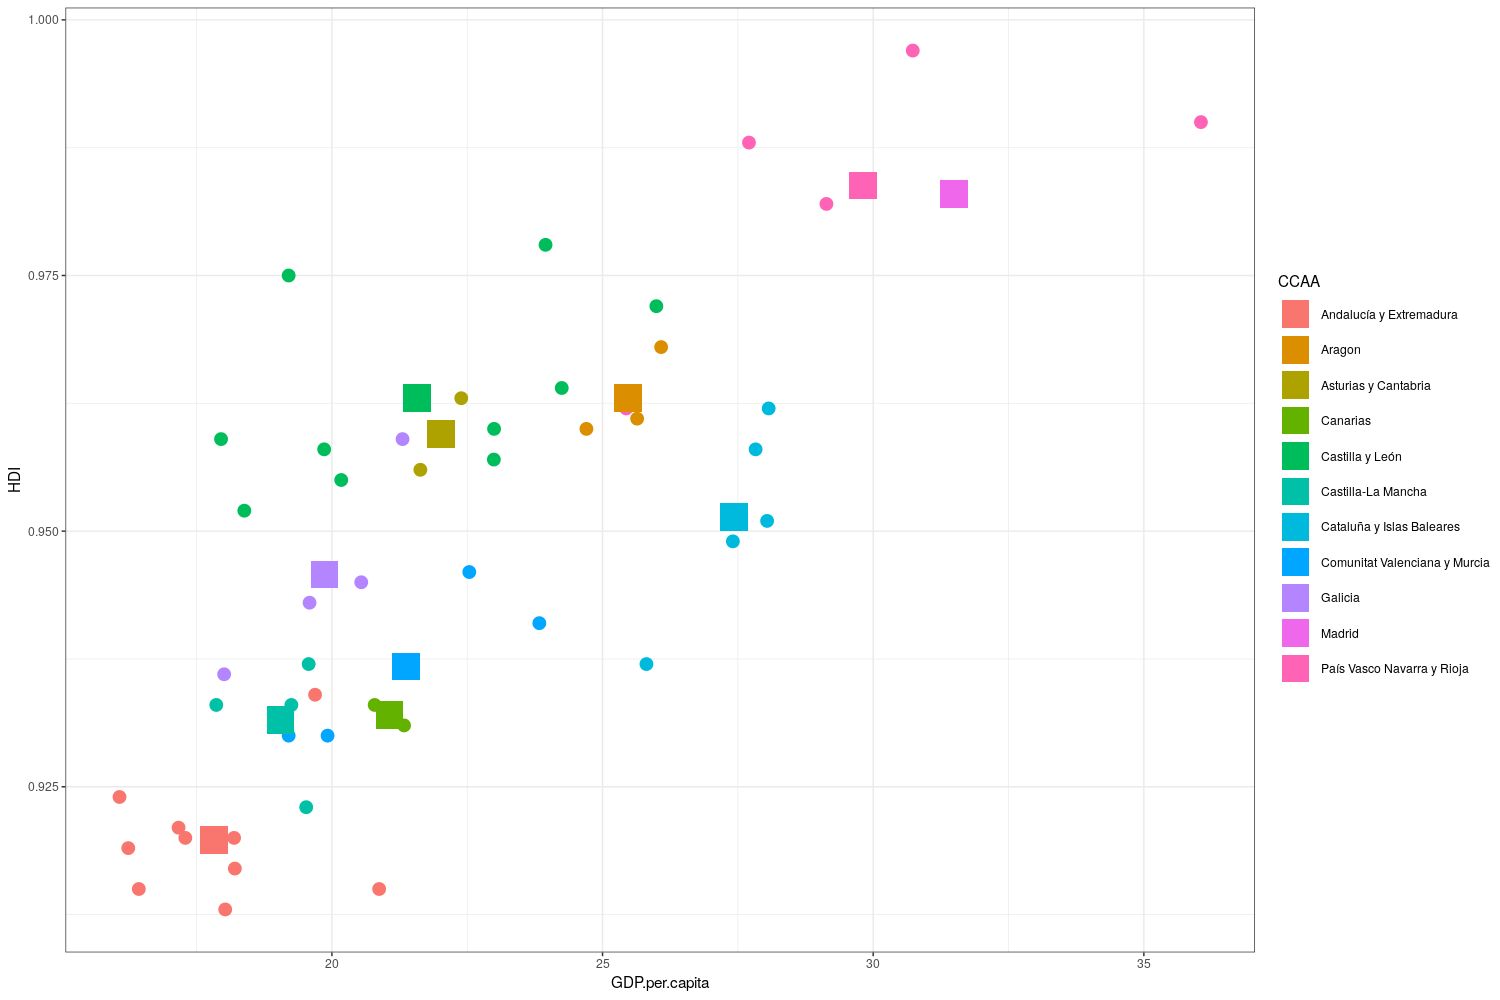

In [15]:
b <- a + geom_point(data=Fig_3, aes(x=GDP_mean, y=HDI_mean, color=CCAA), size=9, shape='square')
b

#### Problem 13- Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.

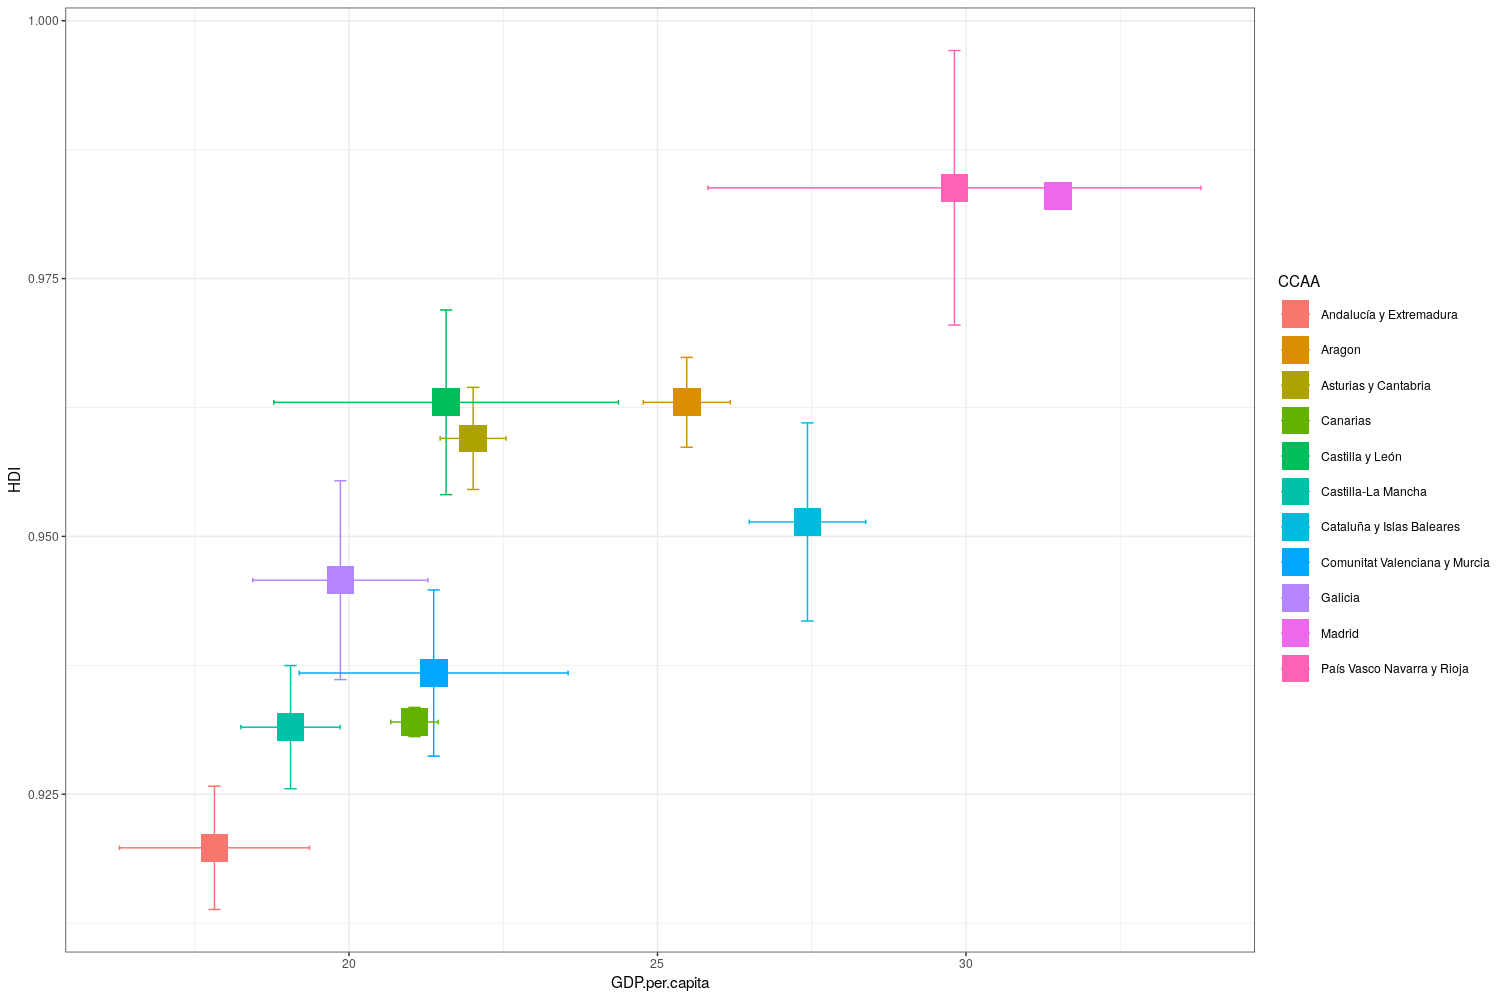

In [47]:
lowerHDI <- Fig_3[,3]-Fig_3[,5]
upperHDI <- Fig_3[,3]+Fig_3[,5]
lowerGDP <- Fig_3[,2]-Fig_3[,4]
upperGDP <- Fig_3[,2]+Fig_3[,4]


GDP.per.capita=Fig_3[,2]
HDI=Fig_3[,3]

df <- data.frame(x=GDP.per.capita, y=HDI, ylower=lowerHDI, yupper=upperHDI, xlower=lowerGDP, xupper=upperGDP, CCAA=Fig_3[,1])

p <- ggplot(df, aes(GDP.per.capita,HDI,colour=CCAA))

c <- p + geom_errorbar(aes(ymin=ylower, ymax=yupper), width=0.2) + geom_errorbarh(aes(xmin=xlower, xmax=xupper))+ geom_point(data=Fig_3, aes(x=GDP_mean, y=HDI_mean, color=CCAA), size=9, shape='square') 
c     

#### Problem 14- Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters  hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)

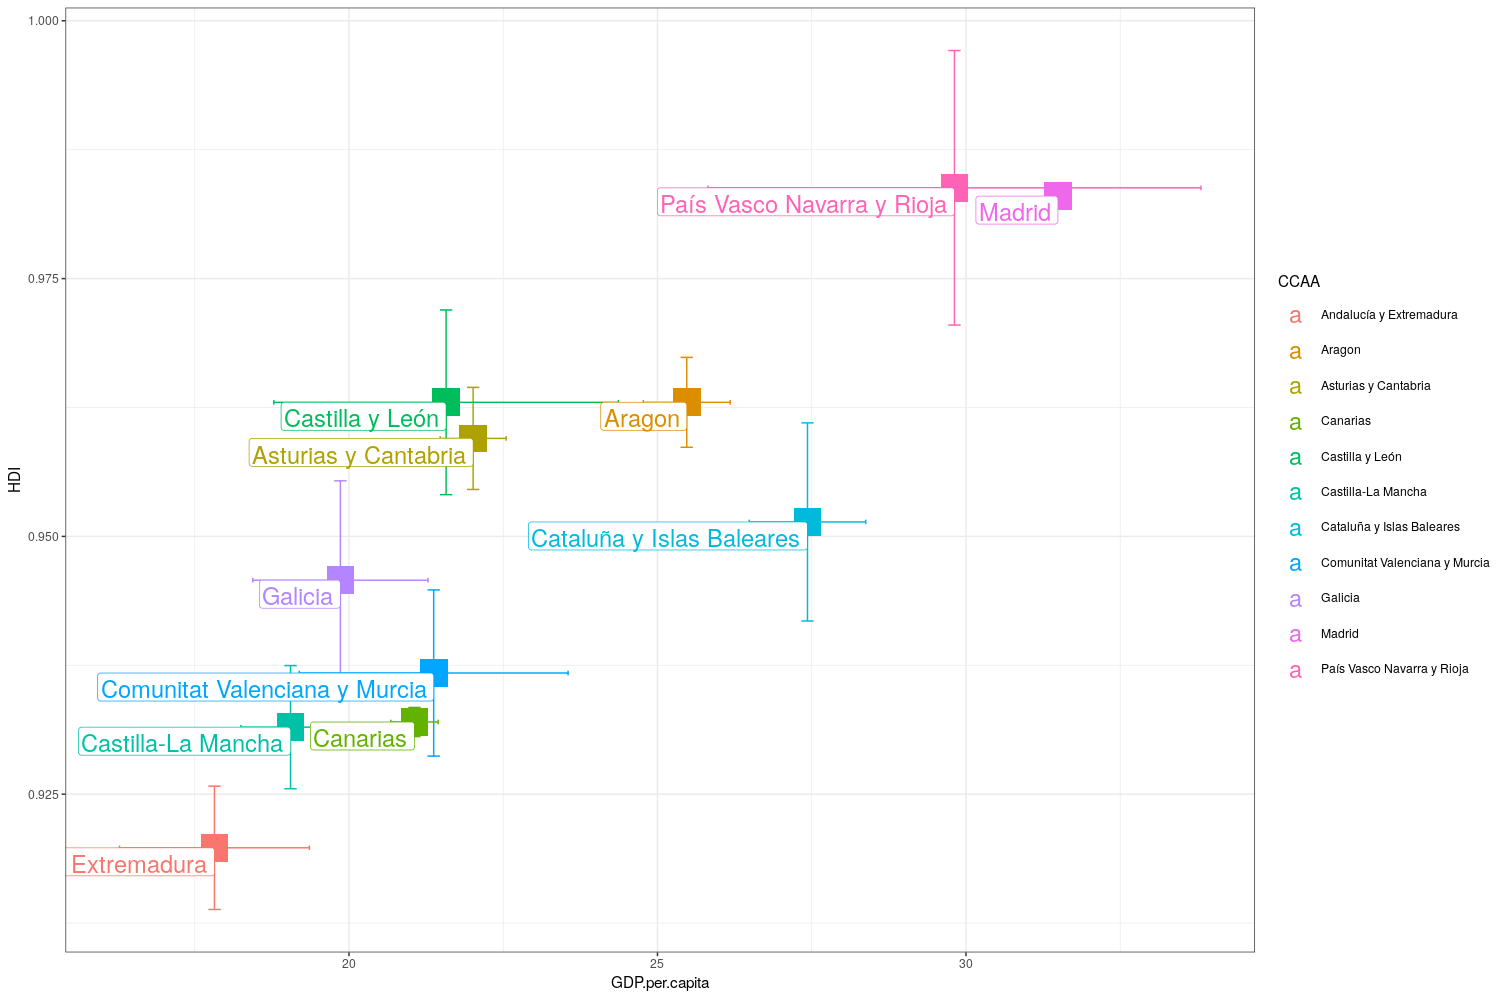

In [48]:
d <- c + geom_label(aes (label=CCAA), size=6, hjust=1, vjust=1)
d

#### Problem 15-*(Optional)* It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). <br> However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP. <br> Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?

In my opinion, by simply looking at the chart, we can´t say that increasing the GDP increase the human development of their citizens (or viceversa), because the HDI is the arithmetic mean between the life expectancy, education and gross domestic product (GDP). The main reason is that you only use a mean, so it masks the reality of human development in the country, there are countries that have a high level of education and health but the GDP is below the average. 

From my point of view, one possibility would be to calculate the median instead of the arithmetic mean, I think it is better when the values are heterogeneous.
